<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: нейрон с разными функциями активации</b></h2>

---

### Сначала необходимо решить ноутбуки `[seminar]perceptron_new.ipynb` и `[seminar]neuron_new.ipynb`!

**Очень часто спрашивают -- а какую функции активации стоит выбрать?** В этом ноутбуке вам предлагается самим дойти до истины и сравнить нейроны с различными функциями активации (их качестве на двух выборках). Не забудьте убедиться, что все эксперименты с разными видами нейронов вы проводите в одинаковых условиях (иначе ведь эксперимент будет нечестным).

В данном задании Вам нужно будет: 
- самостоятельно реализовать класс **`Neuron()`** с разными функциями активации
- обучить и протестировать этот класс на сгенерированных и реальных данных (файлы с реальными данными помещены в папку /data в этой же директории)

В данном ноутбуке Вам предстоит реализовать нейрон с разными функциями активации: Sigmoid, ReLU, LeakyReLU и ELU.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

***В этом ноутбуке используется функция `numpy.random.rand`. Чтобы иметь неслучайные значения, которые помогут нам
проверить ответы на задание, мы введем свою функцию, которая принимает `seed`. Такая функция будет выдавать 
одинаковые значения при одном и том же seed. Не стоит менять seed далее в коде, иначе ответы могут не сойтись.***

In [2]:
def seed_random(seed, *args):
    np.random.seed(seed)
    return np.random.rand(*args)

---

В данном случае мы снова решаем задачу бинарной классификации (2 класса: 1 или 0):

$$
Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2
$$  

Здесь $w \cdot X_i$ - скалярное произведение, а $\sigma(w \cdot X_i) =\frac{1}{1+e^{-w \cdot X_i}} $ - сигмоида ($i$ -- номер объекта в выборке).  

**Примечание:** Здесь предполагается, что $b$ - свободный член - является частью вектора весов: $w_0$. Тогда, если к $X$ приписать единичный столбец, в скалярном произведении $b$ будет именно как свободный член.

In [3]:
def Loss(y_pred, y):
    diff = y_pred - y
    return np.sum(diff*diff)/(2*y.shape[0])

Далее будут предложены несколько функций активации, и вам нужно реализовать класс `Neuron` по аналогии с тем, как это было на семинаре. Сам принцип тот же, но меняются формула обновления весов и формула предсказания.

**Система такая**: Будут три функции активации, у первой все формулы даны, нужно лишь закодить. У второй будет написана производная, но не будет подставлена в $Loss$, это нужно сделать вам. У третьей будет лишь сама формула функции.

<h2 style="text-align: center;"><b>Нейрон с ReLU (Recitified Linear Unit)</b></h2>  

ReLU самая часто используемая (по крайней мере, пару лет назад) функция активации в нейронных сетях. Выглядит она очень просто:

\begin{equation*}
ReLU(x) =
 \begin{cases}
   0, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Или по-другому:

$$
ReLU(x) = \max(0, x)
$$

В (свободном) переводе Rectified Linear Unit = "Усечённая линейная функция". Собственно, мы по сути просто не даём проходить отрицательным числам.

Производная здесь берётся как производная от кусочно-заданной функции, то есть на участках, где функция гладкая (x < 0 и x > 0), берем производную как обычно, и в нуле её доопредляем ее нулём:

\begin{equation*}
ReLU'(x) = 
 \begin{cases}
   0, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

График этой функции и её производной выглядят так:

<img src="https://upload-images.jianshu.io/upload_images/1828517-0828da0d1164c024.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240" width=800, height=400>

Подставим ReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ReLU(w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n}
 \begin{cases}
    y_i^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

(помните, что $w \cdot X_i$ -- это число в данном случае (результат скалярного произведения двух векторов).

Тогда формула для обновления весов при градиентном спуске будет такая (в матричном виде; рекомендуем вывести самим то, как это получается из формулы для одного объекта (см. `[seminar]neuron.ipynb`):

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\sum_{i=1}^{n}
 \begin{cases}
   0, &{w \cdot X_i \le 0}\\
   \frac{1}{n} X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

(напоминаем, что здесь $w \cdot X$ -- матричное произведение вектора $w$ (ведь вектор -- тоже матрица, не так ли?) и матрицы $X$)

Почему в первом случае будет 0? Потому что в формулу $y_i^2$ не входят веса , а мы берём производную именно по весам $w$.

* Реализуйте ReLU и её производную:

In [4]:
def relu(x):
    """ReLU-функция"""
    result = x.copy()
    result[result <= 0] = 0
    return result

In [5]:
def relu_derivative(y):
    """Производная ReLU. Мы вычисляем ее не по x, который подставили в ReLU, а по значению, которое она вернула. 
    На самом деле, мы могли бы так не делать и вычислять производную по x (код при этом даже не поменялся бы), 
    но обычно на стадии обратного прохода у нас уже нет X @ w, который мы передавали в функцию, зато есть 
    вычисленное значение активации - тот самый y"""
    derivative = y.copy()
    derivative[derivative > 0] = 1
    return derivative

Теперь нужно написать нейрон с ReLU. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [29]:
class NeuronReLU:
    def __init__(self, w=None, learning_rate=0.1):
        """
        :param: w -- вектор весов
        """
        # пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.learning_rate = learning_rate
        
    def add_ones(self, X):
        return np.hstack([X, np.ones((X.shape[0], 1))])
  
    def activate(self, x):
        return relu(x)
    
    def derivative(self, y, y_pred):
        n = y.shape[0]
        relu_der = relu_derivative(y_pred)
        return relu_der*(y_pred-y)/n
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ нейрон при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами нейрона
        """
        predictions = X@self.w
        return self.activate(predictions)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов нейрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        delta = self.derivative(y, y_pred)
        delta_w = X.T@delta
        self.w -= self.learning_rate*delta_w
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        X_full = self.add_ones(X)
        if self.w is None:
            self.w = np.zeros((X_full.shape[1], 1))  # столбец (m+1, 1)
        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X_full)
            Loss_values.append(Loss(y_pred, y))
            self.backward_pass(X_full, y, y_pred)
            
        return Loss_values
    
    def predict(self, X):
        """
        Возвращает набор предсказаний для примеров
        """
        
        X_full = self.add_ones(X)
        
        return self.forward_pass(X_full)

<h3 style="text-align: center;"><b>Тестирование нейрона с ReLU</b></h3>  

Здесь Вам нужно самим протестировать новый нейрон **на тех же данных ("Яблоки и Груши")** по аналогии с тем, как это было проделано с перцептроном  (можете смело копировать код, только будьте осторожны - кое-что в нём всё же скорее всего придётся поправить).
В итоге нужно вывести: 
* график, на котором будет показано, как изменяется функция потерь $Loss$ в зависимости от числа итераций обучения
* график с раскраской выборки сигмоидальным нейроном

***ПРИМЕЧАНИЕ***: пожалуйста, почаще проверяйте `.shape` у матриц и векторов: `self.w`, `X` и `y` внутри класса. Очень часто ошибка решается транспонированием или `.reshape()`'ом. Не забывайте проверять, что на что вы умножаете и какой вектор (какой размер) хотите получить на выходе -- это очень помогает не запутаться.

**(для теста) Проверка forward_pass()**

In [39]:
w = np.array([1., 2.])
b = 2.
w = np.hstack([w, b])
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronReLU(w)

X = neuron.add_ones(X)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [ 9. 12.  0.]


*Hint: "**-0.**" -- это просто ноль*

**(для теста) Проверка backward_pass()**

Просьба **не менять `learning rate=0.005` по-умолчанию**.

In [40]:
y = np.array([1, 0, 1])

In [41]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))

w = [-0.06666667 -0.4         1.33333333]


"Яблоки и Груши":

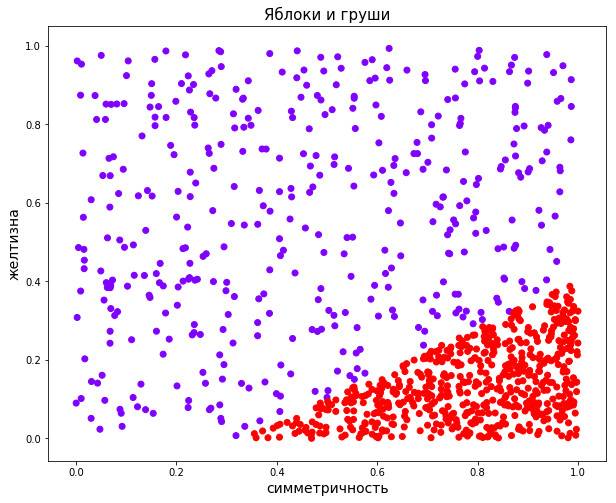

In [42]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [43]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Выведите лосс при обучении нейрона с ReLU на этом датасете:

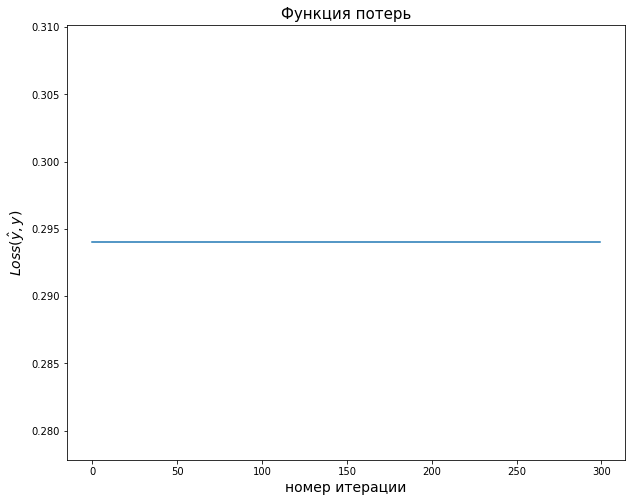

Wall time: 155 ms


In [44]:
%%time

neuron = NeuronReLU()
Loss_values = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Скорее всего сейчас у вас лосс -- это прямая линия, и вы видите, что веса не обновляются. Но почему?!

Всё просто -- возможно мы об этом вам ещё не говорили, но если присмотреться, то видно, что `self.w` и `self.b` иницилизируются нулями в начале `.fit()`-метода. Если расписать, как будет идти обновление, то видно, что из-за ReLU веса просто-напросто не будут обновляться, если начать с инициализации нулями. 

Это -- одна из причин, по которой в нейронных сетях веса инициализируют случаными числами (обычно из отрезка [0, 1)).

Обучим нейрон, инициализировав случайно веса, **используя нашу функция `seed_random` с `seed=42 и 43` из начала ноутбука** (поставьте 10000 итераций), а также просьба **не менять `learning rate=0.005` по-умолчанию**.

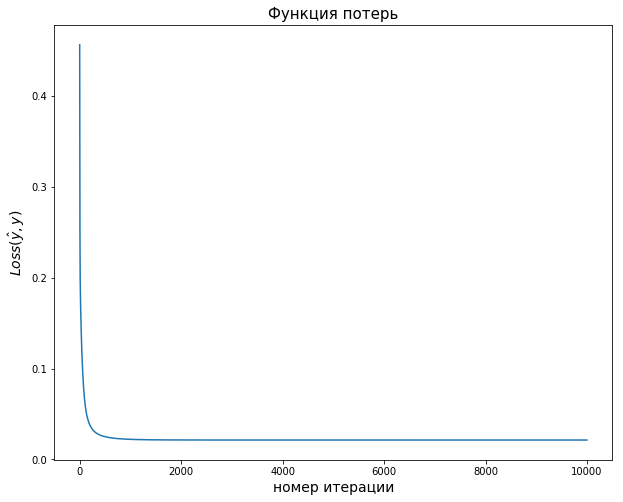

Wall time: 518 ms


In [45]:
%%time

neuron = NeuronReLU(w=seed_random(42, X.shape[1]+1, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**(для теста) Проверка лосса:**

Выведите сумму первых пяти и последних пяти значений loss'а при обучении с num_epochs=10000, округлите до 4-го знака после запятой:

In [46]:
np.round(np.sum(Loss_values[:5]) + np.sum(Loss_values[-5:]), 4)

1.8539

Посмотрим, как предсказывает этот нейрон:

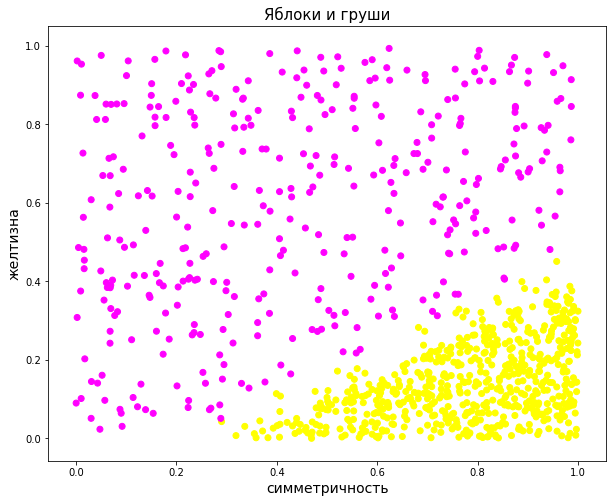

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.predict(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Должно разделиться более-менее неплохо. Но почему мы берём якобы "прокаченную" ReLU, которая часто используется, и она предсказывает хуже (намного дольше сходится), чем перцептрон с пороговой, который никто не использует? Вообще, где и какая функция активации "выстрелит" -- никто не знает заранее, это зависит в том числе от самих данных.

<img src="https://alumni.lscollege.ac.uk/files/2015/12/Interview-questions-square-image.jpg" width=400 height=300>

Но есть одна тенденция: пороговая функция активации и сигмоида (обычно всё же только сигмоида) чаще используются именно на **выходном слое** нейросети в задаче классификации -- ими предсказывают вероятности объектов принадлежать одному из классов, в то время как продвинутые функции активации (ReLU и те, что будут дальше) используются внутри нейросети, то есть на **скрытых слоях**. 

ReLU как будто моделирует то, что нейрон "загорается" по аналогии с тем, как это происходит с биологическим, поэтому помещаеть ReLU на выходной слой обычно плохая идея.

Однако ничто не мешает помещать ReLU на выходной слой, а сигмоиду -- внутрь. Deep Learning -- "очень экспериментальная" область: вы можете сделать открытие своими собственными руками, просто поменяв что-то незначительное, например, функцию активации.

**Плюсы ReLU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде

**Возможные минусы ReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* зануляет все отрицательные входы, тем самым веса у занулённых нейронов могут часто *не обновляться*, эту проблему иногда называют *мёртвые нейроны*

С последней проблемой можно побороться, а именно:

<h2 style="text-align: center;"><b>Нейрон с LeakyReLU (Leaky Recitified Linear Unit)</b></h2>  

LeakyReLU очень слабо отличается от ReLU, но часто помогает сети обучаться быстрее, поскольку нет проблемы "мёртвых нейронов":

\begin{equation*}
LeakyReLU(x) =
 \begin{cases}
   \alpha x, &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
LeakyReLU'(x) = 
 \begin{cases}
   \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

График этой функции:

<img src="https://cdn-images-1.medium.com/max/1600/0*UtLlZJ80TMIM7kXk." width=400 height=300>

Подставим LeakyReLu в Loss:

$$
Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (LeakyReLU(w \cdot X_i) - y_i)^2 =
\begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha \cdot w \cdot X_i - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}
$$  

Формула для обновления весов при градиентном спуске:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
   \alpha X_i^T (w \cdot X_i - y), &{w \cdot X_i \le 0}\\
    X_i^T (w \cdot X_i - y), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте LeakyReLU и её производную:

In [48]:
def leaky_relu(x, alpha=0.01):
    """LeakyReLU-функция"""
    result = x.copy()
    result[result <= 0] = alpha*result[result <= 0]
    return result

In [60]:
def leaky_relu_derivative(y, alpha=0.01):
    """Производная LeakyReLU. Тут мы тоже вычисляем производную по y. Пояснения, почему мы так делаем,
    есть выше"""
    derivative = y.copy()
    derivative[derivative > 0] = 1
    derivative[derivative <= 0] = alpha
    return derivative

Теперь нужно написать нейрон с LeakyReLU функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [50]:
class NeuronLeakyReLU(NeuronReLU):
    def activate(self, x):
        return leaky_relu(x)
    
    def derivative(self, y, y_pred):
        n = y.shape[0]
        relu_der = leaky_relu_derivative(y_pred)
        return relu_der*(y_pred-y)/n

<h3 style="text-align: center;"><b>Тестирование нейрона с LeakyReLU</b></h3>  

***ПРИМЕЧАНИЕ***: пожалуйста, почаще проверяйте `.shape` у матриц и векторов: `self.w`, `X` и `y` внутри класса. Очень часто ошибка решается транспонированием или `.reshape()`'ом. Не забывайте проверять, что на что вы умножаете и какой вектор (какой размер) хотите получить на выходе -- это очень помогает не запутаться.  

**Везде далее для тестирования не меняйте $\alpha$=0.01 в `leaky_relu()` и в `leaky_relu_derivative()`**

**(для теста) Проверка forward_pass()**

In [51]:
w = np.array([1., 2.])
b = 2.
w = np.hstack([w, b])
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = NeuronLeakyReLU(w)

X = neuron.add_ones(X)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [ 9.    12.    -0.054]


*Hint: "**-0.**" -- это просто ноль*

**(для теста) Проверка backward_pass()**

Просьба **не менять `learning rate=0.005` по-умолчанию**.

In [52]:
y = np.array([1, 0, 1])

In [53]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))

w = [-0.067018   -0.40112427  1.33368467]


"Яблоки и Груши":

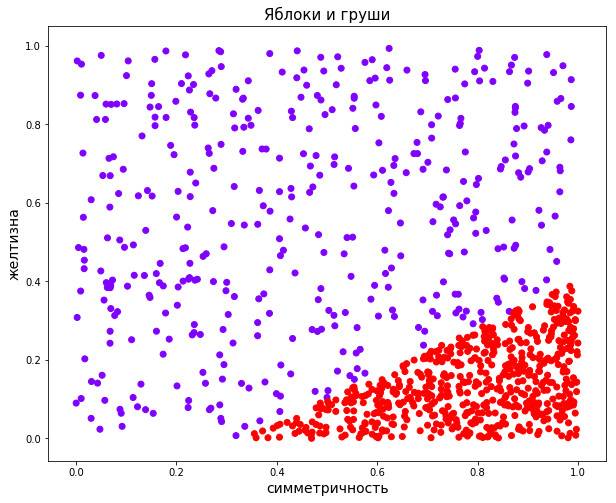

In [54]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [55]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Обучим нейрон, инициализировав случайно веса (поставьте 10000 итераций).

Просьба **не менять `learning rate=0.005` по-умолчанию**.

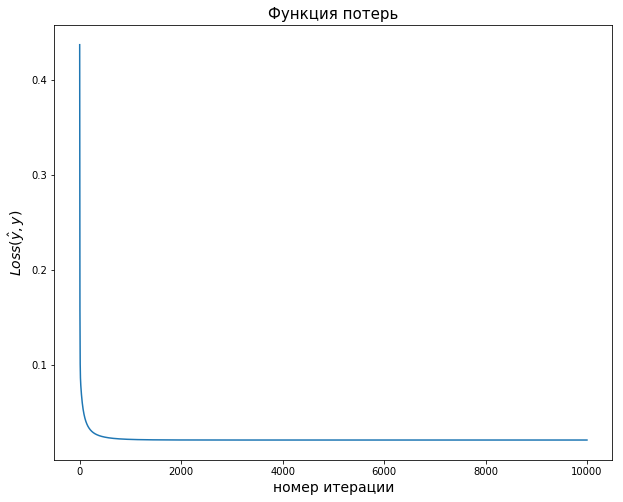

Wall time: 596 ms


In [56]:
%%time

neuron = NeuronLeakyReLU(w=seed_random(13, X.shape[1]+1, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**(для теста) Проверка лосса:**

Выведите сумму первых пяти и последних пяти значений loss'а при обучении с num_epochs=10000, округлите до 4-го знака после запятой:

In [57]:
np.round(np.sum(Loss_values[:5]) + np.sum(Loss_values[-5:]), 4)

1.5583

Посмотрим, как предсказывает этот нейрон:

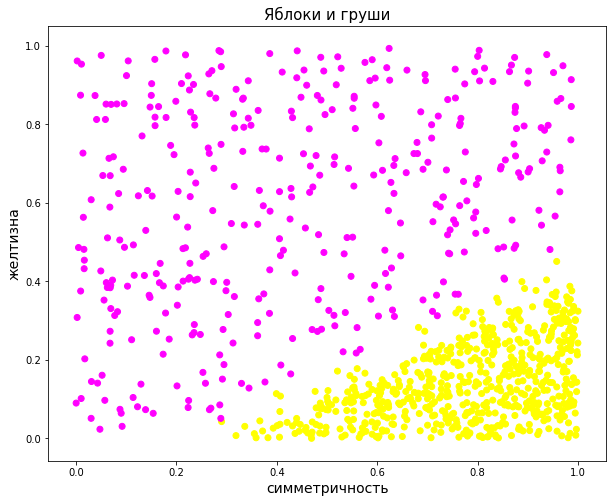

In [58]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.predict(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Плюсы LeakyReLU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU

**Возможные минусы LeakyReLU:**

* не центрирована около 0 (может мешать скорости сходимсти)
* немного не устойчива к "шуму" (см. лекции Стэнфорда)

<h2 style="text-align: center;"><b>Нейрон с ELU (Exponential Linear Unit)</a></b></h2>  
<h2 style="text-align: center;"><b>(необязательная часть, проверяться не будет)</b></h2>


ELU -- не так давно предложенная (в 2015 году) функция активации, которая, как говорят авторы статьи, лучше LeakyReLU. Вот формула ELU:

\begin{equation*}
ELU(\alpha, x) =
 \begin{cases}
   \alpha (e^x - 1), &\text{$x \le 0$}\\
   x, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

где $\alpha$ -- маленькое число от 0 до 1.

Производная здесь берётся так же, но вместо нуля будет $\alpha$:

\begin{equation*}
ELU'(x) = 
 \begin{cases}
   ELU(\alpha, x) + \alpha, &\text{$x \le 0$}\\
   1, &\text{$x \gt 0$}
 \end{cases}
\end{equation*}

Здесь в производной использован постой трюк -- сделано $- \alpha + \alpha$, чтобы вычислять было проще.

График этой функции:

<img src="http://p0.ifengimg.com/pmop/2017/0907/A004001DD141881BFD8AD62E5D31028C3BE3FAD1_size14_w446_h354.png" width=500 height=400>

Подставим LeakyReLu в Loss:

$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (ELU(\alpha, w \cdot X_i) - y_i)^2 = \begin{equation*}
\frac{1}{2n}\sum_{i=1}^{n} 
 \begin{cases}
   (\alpha (e^{w \cdot X_i} - 1) - y_i)^2, &{w \cdot X_i \le 0}\\
   (w \cdot X_i - y_i)^2, &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$  

Формула для обновления весов при градиентном спуске.. Здесь вам нужно выписать её самим, и это чуть сложнее, чем раньше. Брать производную "в лоб" некрасиво и неудобно. Нужно воспользоваться **правилом цепочки**, оно же **правило взятия производной сложной функции**:

$$ \frac{\partial Loss}{\partial w} = \begin{equation*}
\frac{1}{n}\sum_{i=1}^{n} 
 \begin{cases}
    X_i^T (ELU(\alpha, x) + \alpha) (\alpha (e^{w \cdot X_i} - 1) - y_i), &{w \cdot X_i \le 0}\\
    X_i^T (w \cdot X_i - y_i), &{w \cdot X_i \gt 0}
 \end{cases}
\end{equation*}$$

* Реализуйте ELU и её производную:

In [59]:
def elu(x, alpha=0.01):
    """ELU-функция"""
    result = x.copy()
    result[result <= 0] = alpha*(np.exp(result[result <= 0]) - 1)
    return result

In [61]:
def elu_derivative(y, alpha=0.01):
    """Производная ELU, снова вычисляем производную по значению"""
    derivative = y.copy()
    derivative[derivative > 0] = 1
    derivative[derivative <= 0] = derivative[derivative <= 0] + alpha
    return derivative

Теперь нужно написать нейрон с ELU функцией активации:

In [68]:
class NeuronELU(NeuronReLU):
    def activate(self, x):
        return elu(x)
    
    def derivative(self, y, y_pred):
        n = y.shape[0]
        relu_der = elu_derivative(y_pred)
        return relu_der*(y_pred-y)/n

***ПРИМЕЧАНИЕ***: пожалуйста, почаще проверяйте `.shape` у матриц и векторов: `self.w`, `X` и `y` внутри класса. Очень часто ошибка решается транспонированием или `.reshape()`'ом. Не забывайте проверять, что на что вы умножаете и какой вектор (какой размер) хотите получить на выходе -- это очень помогает не запутаться.

"Яблоки и Груши":

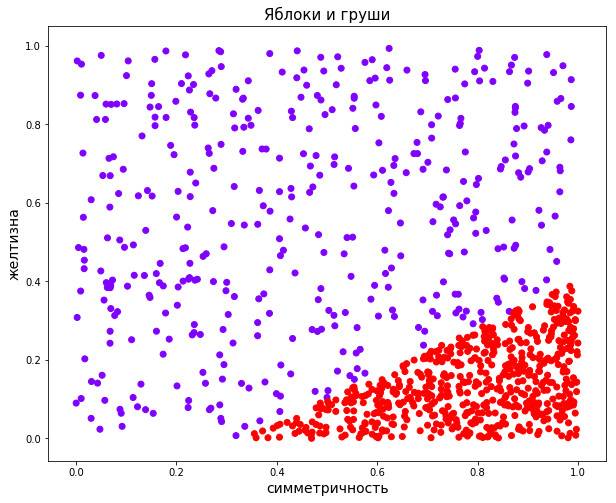

In [69]:
data = pd.read_csv("./data/apples_pears.csv")
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [70]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

Обучим нейрон, инициализировав случайно веса (поставьте 10000 итераций):

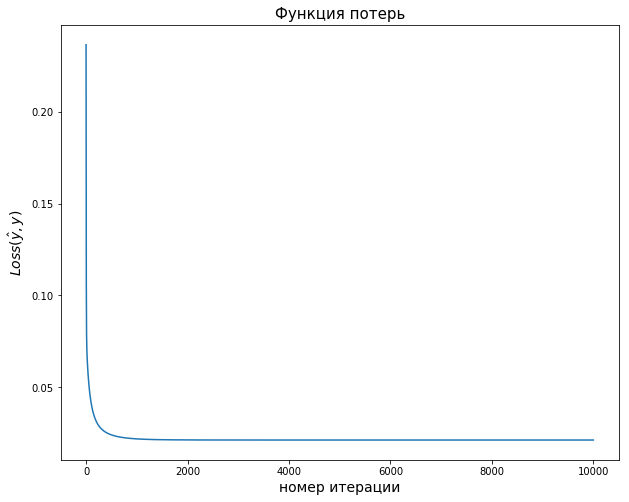

Wall time: 681 ms


In [71]:
%%time

neuron = NeuronELU(w=seed_random(10, X.shape[1]+1, 1))
Loss_values = neuron.fit(X, y, num_epochs=10000)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

**(для теста) Проверка лосса:**

Выведите сумму первых пяти и последних пяти значений loss'а при обучении с num_epochs=10000, округлите до 4-го знака после запятой:

In [72]:
np.round(np.sum(Loss_values[:5]) + np.sum(Loss_values[-5:]), 4)

0.9471

Посмотрим, как предсказывает этот нейрон:

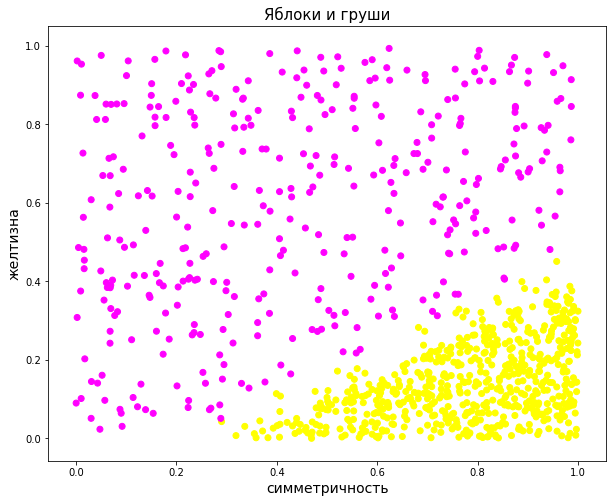

In [73]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.predict(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Плюсы ELU:**

* дифференцируемая (с доопределнием в нуле)
* нет проблемы затухающих градиентов, как в сигмоиде
* нет проблемы "мёртвых нейронов", как в ReLU
* более устойчива к "шуму" (см. лекции Стэнфорда)

**Возможные минусы ELU:**

* не очень хорошо центрирована около 0 (может мешать скорости сходимсти)
* вычислительно дольше, чем ReLU и LeakyReLU

---

И напоследок -- все покемоны (почти):

<img src="http://cdn-images-1.medium.com/max/1600/1*DRKBmIlr7JowhSbqL6wngg.png">

Не хватает `SeLU()` и `Swish()`. Про них можно прочитать здесь: [SeLU](https://arxiv.org/pdf/1706.02515.pdf), [Swish](https://arxiv.org/pdf/1710.05941.pdf).

`Tanh()` (тангенс гиперболический) используется в основном в рекуррентных нейросетях, а `Maxout()` мы решили не рассматривать (так как, опять же, нами не было замечено, что он часто используется, однако про него ходят хорошие слухи).  

---

Думаете, это все функции активации? Нет, ведь за функцию активации можно взять вообще почти любую дифференцируемую функцию (которая, как вы полагаете, будет помогать обучению). Ещё больше функций активации вы можете [найти на википедии](https://en.wikipedia.org/wiki/Activation_function).

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

0). Обязательно прочитайте (если вам позволяет английский) эту статью от Стэнфорда: http://cs231n.github.io/neural-networks-1/

1). Хорошая статья про функции активации: https://www.jeremyjordan.me/neural-networks-activation-functions/

2). [Видео от Siraj Raval](https://www.youtube.com/watch?v=-7scQpLossT7uo)

3). Современная статья про функции активации. Теперь на хайпе активация $swish(x) = x\sigma (\beta x)$: https://arxiv.org/pdf/1710.05941.pdf (кстати, при её поиске в некоторой степени использовался neural architecture search)

4). SeLU имеет очень интересные, доказанные с помощью теории вероятностей свойства: https://arxiv.org/pdf/1706.02515.pdf (да, в этой статье 102 страницы)

5). [Список функций активации из википедии](https://en.wikipedia.org/wiki/Activation_function)